# **PENDAHULUAN**

##### Masalah yang akan dibahas adalah analisis opini pengguna Twitter mengenai tiket borobudur

*   Tipe data yang dipakai pada proyek kali ini diantaranya :
1.  created_at = datetime [ns, UTC]
2.  id = int
3.  id_str = int
4.  full_text = object
5.  truncated = bool
6.  display_text_range = object
7.  entities = object
8.  metadata = object
9.  source = object
10.  in_reply_to_status_id = float
11.  in_reply_to_status_id_str = float
12.  in_reply_to_user_id = float
13.  in_reply_to_user_id_str = float
14.  in_reply_to_screen_name = float
15.  user = object
16.  geo = float
17.  coordinates = float
18.  place = object
19.  contributors = float
20.  is_quote_status = bool
21.  retweet_count = int
22.  favorite_count = int
23.  favorited = bool
24.  retweeted = bool
25.  lang   = object
26.  extended_entities = object
27.  possibly_sensitive = float
28.  retweeted_status = object

* Penjelasan dari pengukuran-pengukuran tersebut :

1. 	created_at  = Menunjukkan waktu tweet dibuat, sesuai UTC negara masing-masing.
2. 	id = nomer identitas pengguna.
3. 	id_str = nomer identitas pengguna.
4. 	full_text = Berisi teks dari tulisan pengguna twitter.
5. 	truncated = Berisi nilai False atau True untuk kondisi teks jika berkelanjutan. Biasanya terjadi True jika cuitan berupa Thread.
6. 	display_text_range = Panjang teks yang di tulis.
7. 	Entities = Kata-kata atau objek unik, seperti hastagh dan lainnya.
8. 	Metadata = berisikan Kode unik Bahasa yang digunakan.
9. 	Source = Link cuitan twitter.
10.  in_reply_to_status_id = nomer identitas reply yang me-reply cuitan.
11.  in_reply_to_status_id_str = nomer identitas reply yang me-reply cuitan.
12.  in_reply_to_user_id = nomer identitas pengguna yang me-reply cuitan.
13.  in_reply_to_user_id_str = nomer identitas pengguna yang me-reply cuitan.
14.  in_reply_to_screen_name = Nama pengguna yang di tampilkan (bukan username).
15.  user = nama pengguna.
16.  geo = letak geografi pengguna.
17.  coordinates = Berisi nilai Latitude dan Longtitud saat menulis cuitan.
18.  place = Lokasi saat menulis cuitan.
19.  contributors = Jumlah pengguna lain yang melakukan interaksi terhadap cuitan.
20.  is_quote_status = Isi retweet pengguna lain.
21.  retweet_count = Jumlah pengguna lain yang melakukan retweet ke cuitan.
22.  favorite_count = Jumlah pengguna lain yang melakukan like ke cuitan.
23.  favorited   = Pengguna lain yang melakukan like.
24.  retweeted = Pengguna lain yang melakukan retweet.
25.  lang   = jenis Bahasa yang dibunakan.
26.  extended_entities = Media-media yang ada di dalam cuitan, seperti foto, music/suara, video, Gif dan lainnya.
27.  possibly_sensitive = Keterangan untuk jenis media yang adakah, apakah perlu ada Flag pada media tersebut.
28.  retweeted_status = Keterangan apakah cuitan itu Retweet atau bukan.









## **IMPORTING MODULE**
Proses pertama yang dilakukan sebelum dilakukan pre-proccessing data adalah mengimport modul yang akan digunakan nantinya

In [ ]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/contoh.pdf
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.dic
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install --upgrade unidecode twython tweepy beautifulsoup4 pyLDAvis
    !pip install --upgrade unidecode twython tweepy beautifulsoup4 tika
    !python -m spacy download en
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm
    !python -m spacy download xx_ent_wiki_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

In [ ]:
import tweepy
import taudataDDGsna as tau
import tweepy, json, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
import networkx as nx, matplotlib.pyplot as plt
import taudataEDA02CTA as tau3
import json, urllib.request, requests, tweepy
from urllib.request import Request, urlopen
import graphviz, taudata_sna as tau2
from textblob import TextBlob
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()


## **Pengambilan Data**
data yang akan dipre-proccessing akan diambil dari data social media, yakni twitter. Topik yang akan dilakukan analisis adalah mengenai keputusan Mentri kemaritiman, Luhut Binsar Pandjaitan dalam menaikkan harga tiket masuk ke candi Borobudur

In [ ]:
api_key = "3mHT5Y0rmRbGpUAKUauvMARdq"
api_secret_key = "ARvqgvNq8vwFzsbBQX4qqsZnmGiWK7LFM7dEnmwqzcOGSekb63"
access_token = "1518852721394085888-BmwHAUAMcXaYeuafhd7W5gk1HbDNZ4"
access_token_secret = "GSUCidJHni1er3PyDByAZkj8ZKAUpseHHe4EXmhTroNNq"

In [ ]:
auth = tweepy.auth.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True, timeout=180, retry_count=5, retry_delay=3)


##### ***Note:***
Code ini dibuat untuk menarik semua tweet yang mengandung kata kunci "tiket borobudur" yang berbahasa Indonesia, banyaknya tweet yang akan diambil adalah 1000 tweet

In [ ]:
N = 1000 # jumlah N tweet "terkini" yang ingin diambil
T = []
for post in tqdm(tweepy.Cursor(api.search_tweets, q=" tiket borobudur", lang='id', tweet_mode='extended').items(N)):
    T.append(post)

"Done"

1000it [00:23, 42.35it/s]


'Done'

#### ***Note:***
melalui codes ini, akan ditampilkan 1000 tweets tersebut dalam format .json

In [ ]:
T[0]._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Jun 12 06:59:23 +0000 2022',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 1344453850707595269,
    'id_str': '1344453850707595269',
    'indices': [3, 13],
    'name': 'anne\uea00',
    'screen_name': 'vienanne_'}]},
 'favorite_count': 0,
 'favorited': False,
 'full_text': 'RT @vienanne_: gegara Luhut bikin aturan tiket masuk borobudur utk domestik  750 RIBU ... 👇\n\nknapa bisa sebesar itu pak ??? https://t.co/cm…',
 'geo': None,
 'id': 1535879418266423297,
 'id_str': '1535879418266423297',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'in',
 'metadata': {'iso_language_code': 'in', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 2,
 'retweeted': False,
 'retweeted_status': {'contrib

#### ***Penjelasan:***
dengan codes ini akan ditampilkan jumlah tweets yang berhasil didapatkan

In [ ]:
tweet = [t._json for t in T]
print(' Berhasil mendapatkan {} tweets'.format(len(tweet)))

 Berhasil mendapatkan 1000 tweets


#### ***Penjelasan:***
akan ditampilkan semua tweets yang sudah berhasil diambil

In [ ]:
tweet = [t._json for t in T]
isiTweet = [t['full_text'] for t in tweet]
isiTweet

['RT @vienanne_: gegara Luhut bikin aturan tiket masuk borobudur utk domestik  750 RIBU ... 👇\n\nknapa bisa sebesar itu pak ??? https://t.co/cm…',
 'RT @Ameliadhenok: #BersatuLawanOligarki \n#BersatuLawanOligarki \n@JamanEdan543123\n@alhadi36703630\n@Dewmor651\n@Gobeth5\n@Kardun65034867\n@aka_a…',
 'RT @CryptoKuta: Pemerintah sepakat menunda pemberlakuan harga tiket masuk ke Candi Borobudur di Jawa Tengah. \nMenteri BUMN Erick Thohir ,pe…',
 'RT @beritaKBR: Rela melanggar peraturan di kebun binatang dan berakhir ditarik sama orangutan, demi sebuah konten? Duh, segitunya!\n\nEh, har…',
 'Kabar Harga tiket Candi Borobudur belum pasti naik lho, ini penjelasannya. \n. \n\n#TerimaKasihGreysiaPolii #apakabarhaters #FIFA #IndonesiaMaster2022 https://t.co/I55oG0i9H4',
 'RT @CryptoKuta: Pemerintah sepakat menunda pemberlakuan harga tiket masuk ke Candi Borobudur di Jawa Tengah. \nMenteri BUMN Erick Thohir ,pe…',
 'RT @beritaKBR: Demi sebuah konten sampai rela melanggar peraturan di kebun binata

#### ***Penjelasan:***
Hasil crawling tersebut selanjutnya akan disimpan ke dalam file text sederhana dengan format .json

In [ ]:
def saveTweets(tweets, file='Tweets.json'): #in Json Format
    with open(file, 'w') as f:
        for t in tweets:
            try:
                f.write(json.dumps(t)+'\n')
            except:
                pass

In [ ]:
fileName = 'Tweets_Borobudur.json'
saveTweets(tweet, file=fileName)
print('Saved to '+fileName)


Saved to Tweets_Borobudur.json


# **PRE-PROCESSING**
Pada pre-proccessing akan dilakukan beberapa proses, yakni mengganti slang, menghapus kata-kata yang banyak muncul tetapi tidak mempunyai pengaruh besar, dan yang lainnya.

Pre-proccessing ini dilakukan agar nanti ketika melakukan visualisasi, diperoleh insight yang bermanfaat pada analisis

#### ***Penjelasan:***
codes ini dibuat untuk menghapus stopwords yang ada pada tweet. Modul yang digunakan adalah modul Sastrawi. Stopwords adalah kata yang banyak sekali muncul dalam data, tetapi tidak berpengaruh besar, atau kata yang sedikit sekali muncul sehingga dapat diabaikan


In [ ]:
NLTK_StopWords = stopwords.words('indonesian')
Sastrawi_StopWords_id = factory.get_stop_words()

df=open('data/stopwords_id.txt',"r",encoding="utf-8", errors='replace')
id_stop = df.readlines()
df.close()
id_stop = [t.strip().lower() for t in id_stop]

N = 1000
print(NLTK_StopWords[:N])
print(Sastrawi_StopWords_id[:N])
print(id_stop[:N])
print(len(Sastrawi_StopWords_id), len(id_stop), len(NLTK_StopWords))

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [ ]:
stopId, lemmaId = tau.LoadStopWords(lang='id')
stopId.add('kah')

'kah' in stopId

True

In [ ]:
stopId, lemmaId = tau.LoadStopWords(lang='id')
stopId.add('iya')

'iya' in stopId

True

In [ ]:
stopId, lemmaId = tau.LoadStopWords(lang='id')
stopId.add('unknown')
'unknown' in stopId

True

In [ ]:
slangFixId = tau.loadCorpus(file = 'data/slang.txt', sep=':')

slangFixId

{'&': 'dan',
 '1pun': 'satupun',
 '7an': 'tujuan',
 '@': 'di',
 'Dr': 'dokter',
 'Jkt': 'Jakarta',
 'Jkw': 'jokowi',
 'Napza': 'narkoba psikotropika dan zat adiktif',
 'Nasihat': 'nasehat',
 'SE': 'Surat Edaran',
 'ababil': 'abg labil',
 'abis': 'habis',
 'acc': 'accord',
 'accord': 'sesuai',
 'ad': 'ada',
 'adl': 'adalah',
 'adlah': 'adalah',
 'adlh': 'adalah',
 'administ': 'administrasi',
 'adoh': 'aduh',
 'afaik': 'as far as i know',
 'agma': 'agama',
 'aha': 'tertawa',
 'ahaha': 'haha',
 'ahiok': 'ahok',
 'ahoax': 'ahok',
 'ahokncc': 'ahok',
 'aing': 'saya',
 'aj': 'saja',
 'aja': 'saja',
 'ajak2': 'ajak-ajak',
 'ajep-ajep': 'dunia gemerlap',
 'ajj': 'saja',
 'ak': 'aku',
 'aka': 'dikenal juga sebagai',
 'akherat': 'akhirat',
 'akhirx': 'akhirnya',
 'akika': 'aku',
 'akko': 'aku',
 'akkoh': 'aku',
 'akku': 'aku',
 'akn': 'akan',
 'aktifis2': 'aktivis-aktivis',
 'aktivi': 'aktivis',
 'aktivis2': 'aktivis-aktivis',
 'akun2': 'akun-akun',
 'akuwh': 'aku',
 'akyu': 'aku',
 'alay': 'nor

In [ ]:
stopId, _ = tau.LoadStopWords(lang='id')
stopId.add("rt")

list(stopId)[:1000]

['nah',
 'semacam',
 'akhirnya',
 'terdahulu',
 'mengerjakan',
 'kinilah',
 'dimaksudkan',
 'adalah',
 'umum',
 'sekecil',
 'jangan',
 'dia',
 'itukah',
 'dekat',
 'seluruh',
 'sepanjang',
 'panjang',
 'tentunya',
 'malahan',
 'kemudian',
 'termasuk',
 'walaupun',
 'kalaupun',
 'sejumlah',
 'tersampaikan',
 'tanyanya',
 'persoalan',
 'diperlukan',
 'berakhirlah',
 'ditunjukkannya',
 'katanya',
 'demi',
 'lagi',
 'nyaris',
 'menuju',
 'hendaklah',
 'seperlunya',
 'melihat',
 'mula',
 'asalkan',
 'segala',
 'rasanya',
 'sela',
 'bagai',
 'pertama',
 'punya',
 'besar',
 'dikerjakan',
 'memisalkan',
 'disinilah',
 'mengibaratkan',
 'diibaratkan',
 'jawabnya',
 'tentu',
 'terdapat',
 'sekalian',
 'belumlah',
 'boleh',
 'siapa',
 'soalnya',
 'jelaslah',
 'tidakkah',
 'seusai',
 'setempat',
 'betul',
 'setinggi',
 'selain',
 'kebetulan',
 'nantinya',
 'sudahkah',
 'sebutlah',
 'lima',
 'memintakan',
 'amatlah',
 'mengatakannya',
 'padanya',
 'menanyai',
 'sampai-sampai',
 'jawab',
 'kitalah',

In [ ]:
def loadTweets(file='Tweets.json'):
    f=open(file,encoding='utf-8', errors ='ignore', mode='r')
    T=f.readlines();f.close()
    for i,t in enumerate(T):
        T[i] = json.loads(t.strip())
    return T


In [ ]:
T2 = loadTweets(file=fileName)
D = [t['full_text'] for t in T2]
clean_data = []
for t in tqdm(D):
    doc = tau.cleanText(t, fix=slangFixId, lan='id', stops = stopId)
    clean_data.append(doc)
stopId, lemmaId = tau.LoadStopWords(lang='id')

"Done"

100%|██████████| 1000/1000 [00:00<00:00, 1790.50it/s]


'Done'

In [ ]:
import re, unicodedata
def cleaning(str):
    #remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    #remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    #remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    #to lowercase
    str = str.lower()
    #Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)

    return str

In [ ]:
#test the code
sentences = ["Borobudur dirancang TIDAK untuk tempat wisata 🙏😇"]
for st in sentences:
    r = cleaning(st)
    print(r)

borobudur dirancang tidak untuk tempat wisata


In [ ]:
slangFixId = tau.loadCorpus(file = 'data/slang.txt', sep=':')

cleaned_data = []
for tweet in tqdm(isiTweet):
    cleaned_data.append(tau.cleanText(tweet, lemma=lemmaId, lan='id', stops = stopId, fix=slangFixId))

cleaned_data

100%|██████████| 1000/1000 [00:01<00:00, 679.11it/s] 


['rt vienanne gara-gara luhut bikin atur tiket masuk borobudur domestik ribu knapa ',
 'rt ameliadhenok satu lawan oligarki satu lawan oligarki aka a',
 'rt cryptokuta perintah sepakat tunda laku harga tiket masuk kah candi borobudur jawa menteri bumn erick thohir pe',
 'rt beritakbr rela langgar atur kebun binatang tarik orangutan konten aduh segitunya eh har',
 'kabar harga tiket candi borobudur lho jelas  terima kasih greysia polii apakabarhaters indonesia master',
 'rt cryptokuta perintah sepakat tunda laku harga tiket masuk kah candi borobudur jawa menteri bumn erick thohir pe',
 'rt beritakbr konten rela langgar atur kebun binatang tarik orangutan begit',
 'rt cryptokuta perintah sepakat tunda laku harga tiket masuk kah candi borobudur jawa menteri bumn erick thohir pe',
 'rt ameliadhenok satu lawan oligarki satu lawan oligarki aka a',
 'rt ameliadhenok satu lawan oligarki satu lawan oligarki aka a',
 'rt ameliadhenok satu lawan oligarki satu lawan oligarki aka a',
 'rt cryptokut

In [ ]:
filename = 'Tweets.json'.replace('.json','.txt')
tau2.saveTweets(clean_data, file=filename)

'Tweets Saved: '.format(filename)



'Tweets Saved: '

# **VISUALISASI DATA**
Pada visualisasi kami kali ini, kami akan menggunakan Voyant Online untuk memudahkan proses visualisasi dari data text hasil preprocessing yang telah kami lakukan.


## **Hasil Visualisasi lengkapnya dapat dilihat pada:**

* https://voyant-tools.org/?corpus=d74fbb0e0ac6f48e969283977aa52326
* https://www.jasondavies.com/wordtree/?source=b2dfd43f840b25709d32d75b77bbc067&prefix=tiket%20

# **Cirrus**

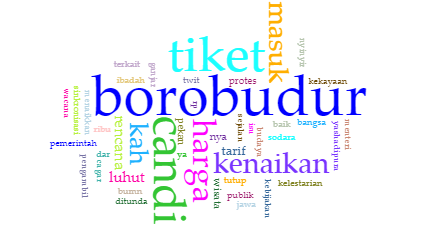

##### Analisis:
Visualisasi menggunakan Cirrus menghasilkan informasi berupa kata kata yang sering muncul. Dengan menggunakan kata kunci "tiket borobudur" pada awal pengambilan data, didapatkan kata yang paling sering muncul berturut turut adalah "borobudur", "tiket", "candi", "harga", dan "kenaikan"

# **Table**
<table>
	<thead>
		<tr>
			<td>Term</td>
			<td>Count</td>
			<td>Trend</td>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td>borobudur</td>
			<td>1050</td>
			<td>0.08246289</td>
		</tr>
		<tr>
			<td>tiket</td>
			<td>937</td>
			<td>0.07358831</td>
		</tr>
		<tr>
			<td>candi</td>
			<td>689</td>
			<td>0.054111365</td>
		</tr>
		<tr>
			<td>harga</td>
			<td>428</td>
			<td>0.033613447</td>
		</tr>
		<tr>
			<td>kenaikan</td>
			<td>341</td>
			<td>0.026780806</td>
		</tr>
		<tr>
			<td>masuk</td>
			<td>296</td>
			<td>0.023246681</td>
		</tr>
		<tr>
			<td>rencana</td>
			<td>174</td>
			<td>0.013665279</td>
		</tr>
		<tr>
			<td>luhut</td>
			<td>171</td>
			<td>0.013429671</td>
		</tr>
		<tr>
			<td>tarif</td>
			<td>168</td>
			<td>0.013194063</td>
		</tr>
		<tr>
			<td>wisata</td>
			<td>125</td>
			<td>0.009817011</td>
		</tr>
		<tr>
			<td>protes</td>
			<td>122</td>
			<td>0.009581403</td>
		</tr>

###### Table ini memberikan informasi yang lebih rinci yaitu adanya **Count** yang menunjukkan berapa banyak istilah ditemukan dalam data dan **Trend** yang menunjukkan frekuensi relatif untuk setiap istilah  di setiap dokumen dalam korpus

# **Trends**

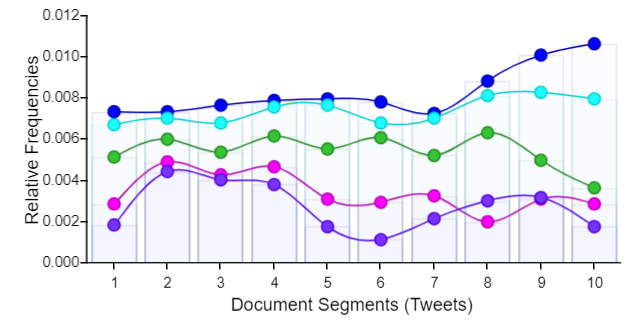

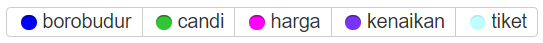

###### Analisis:
Seperti yang disebutkan pada bagian tabel, **Trend** digunakan untuk menunjukkan frekuensi relatif untuk setiap istilah di setiap dokumen dalam korpus. Visualisasi di atas menunjukkan istilah "borobudur" memiliki frekuensi tinggi dalam setiap segmen dokumen. Sedangkan, istilah "harga" dan "kenaikan", frekuensi relatifnya mulai menurun pada segmen dokumen ke lima.

# **Links**

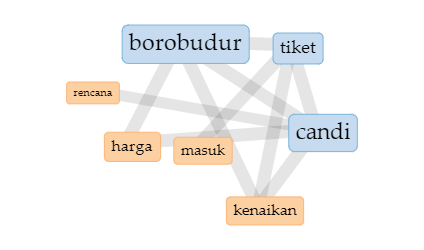

###### Analisis:
Berdasarkan visualisasi di atas, dapat terlihat bahwa istilah "borobudur" erat kaitannya dengan istilah "candi", "kenaikan", "tiket", dan "harga". "candi" berkaitan dengan seluruh istilah yang tampil pada gambar. "harga" berkaitan dengan "borobudur" dan "candi"."tiket" berkaitan dengan "borobudur", "masuk", "kenaikan", dan "candi".


# **WORD TREE**

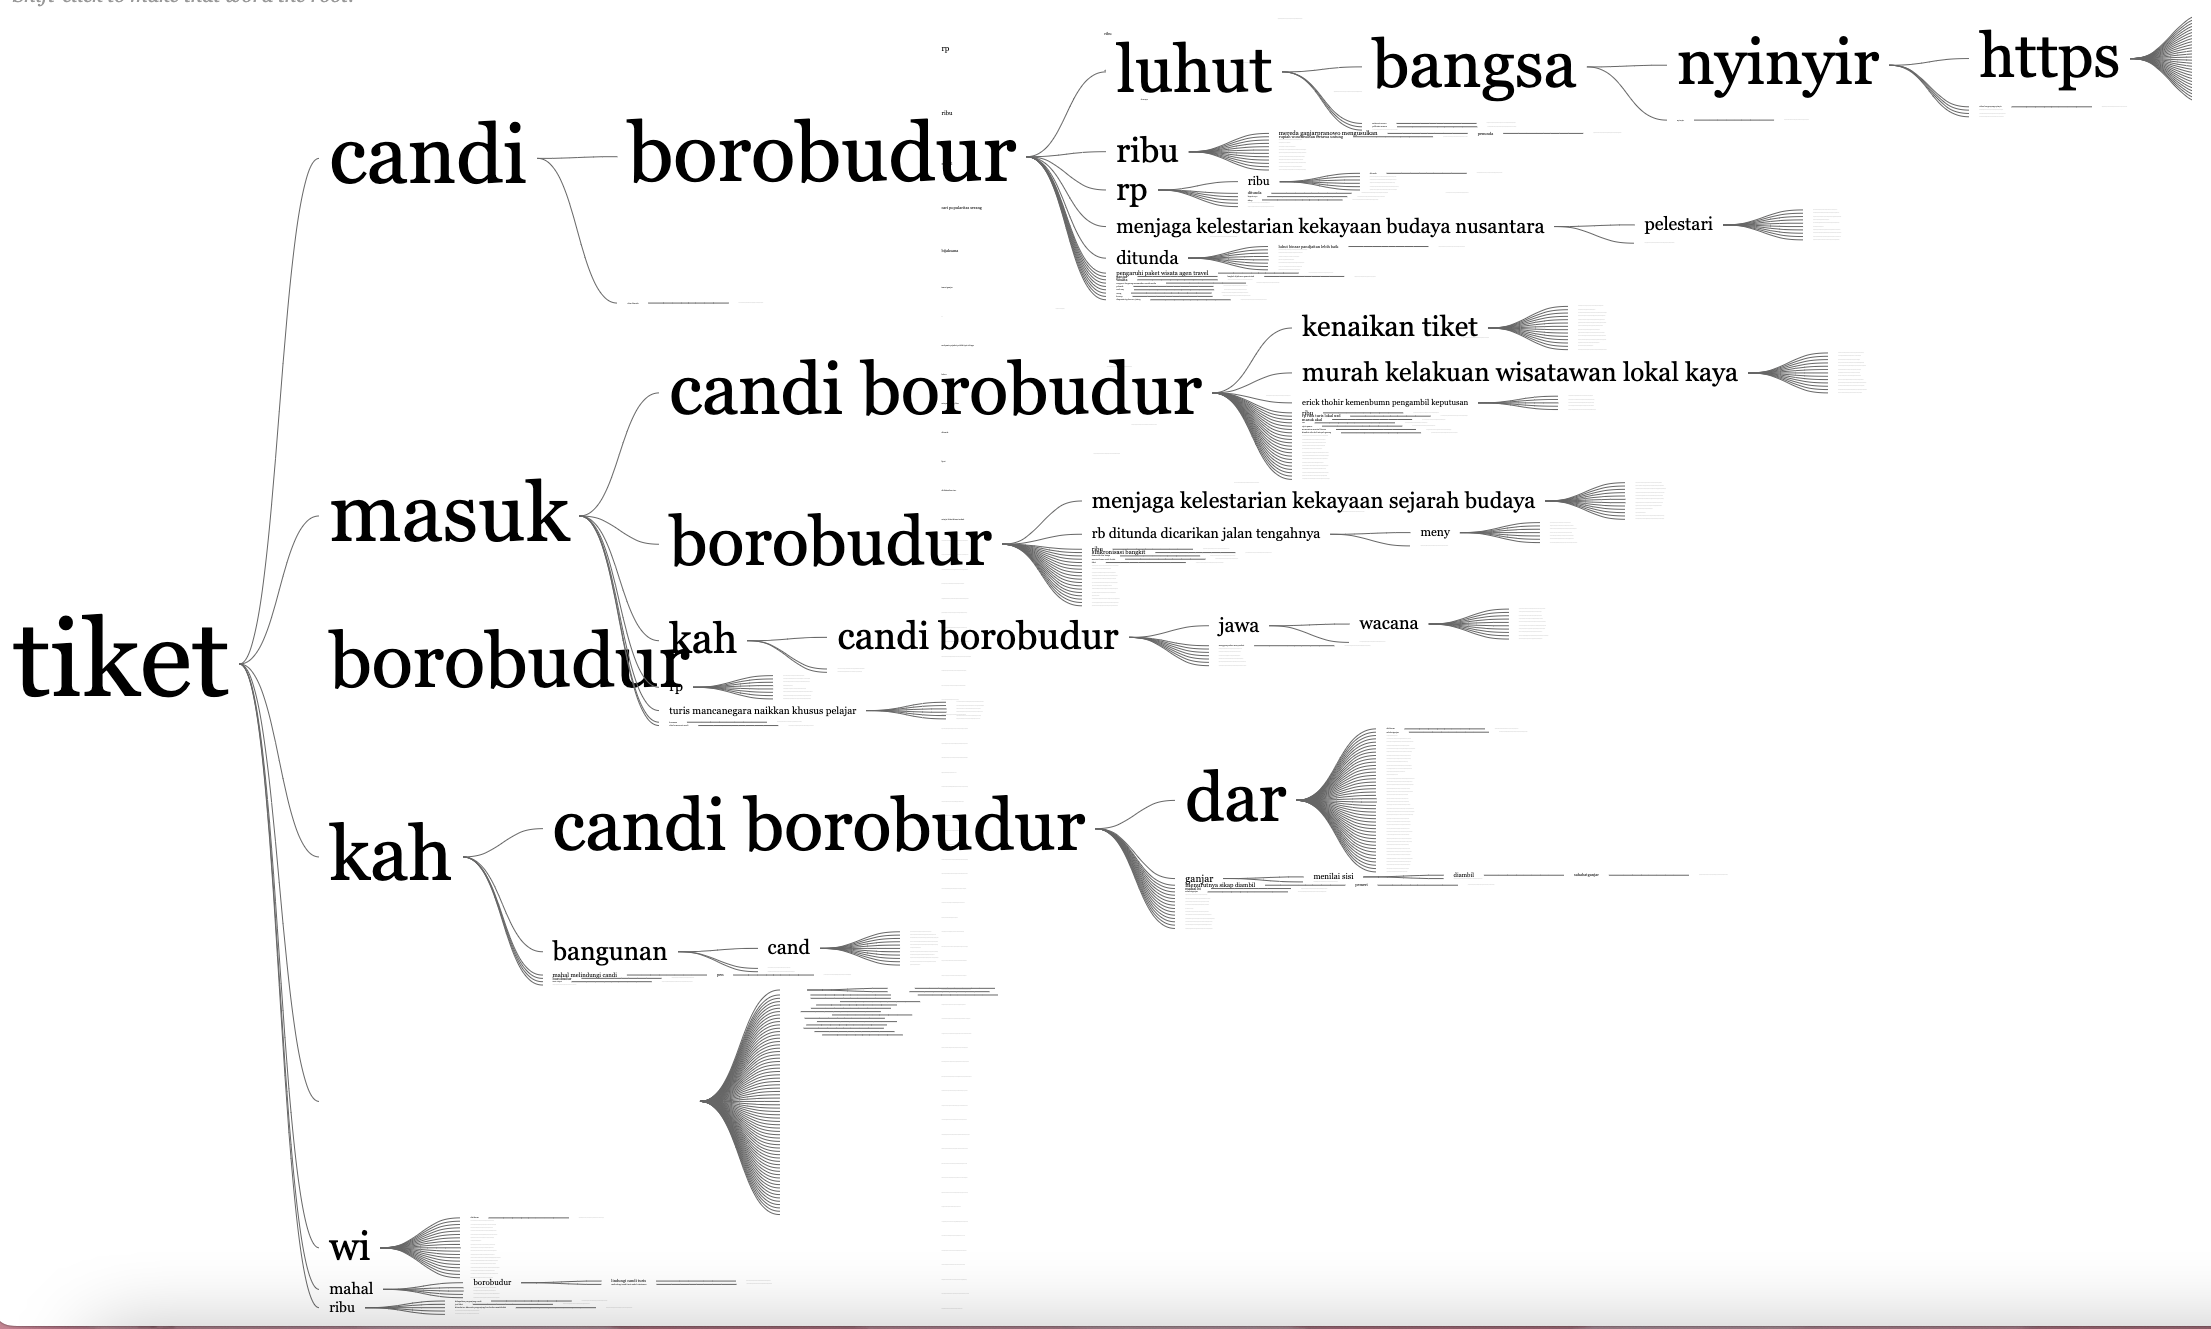

### Analisis:
Berdasarkan visualisasi di atas, dengan kata kunci "tiket", ada beberapa kata yang punya hubungan erat seperti: tiket-masuk, tiket-borobudur tiket-candi. Selain itu ada beberapa kata juga yang memiliki ukuran yang cukup besar, yakni luhut, bangsa, kenaikan harga dan yang lainnya.


# **KESIMPULAN**
**Rencana ini ternyata banyak menuai kritikan dari masyarakat, dari 1000 tweet yang kami ambil, terbukti dengan melihat dari visualisasi ada beberapa kata kunci yang paling sering muncul adalah "borobudur", "tiket", "candi", "harga", dan "kenaikan",  selain dari kata kunci yang paling sering muncul tersebut, istilah seperti: "ditunda", "nyinyir", "murah kelakuan wisatawan lokal kaya", protes" dan yang lainnya pun cukup sering muncul, terbukti dari visualisasinya, kata ini berukuran tidak terlalu kecil. Hal ini menandakan adanya perlawanan masyarakat terhadap wacana pemerintah dalam menaikkan harga tiket masuk ke candi borobudur.**

